In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [73]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [76]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Fill NA Values With Mean For Continuous Variable

In [77]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

# Feature Engineering

In [78]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [79]:
df[['SibSp']].head()

,SibSp
0,1
1,1
2,0
3,1
4,0


In [80]:
df[['Parch']].head()

,Parch
0,0
1,0
2,0
3,0
4,0


In [81]:
# add new features (Family)
df['Family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis= 'columns', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [82]:
max(df['Age']), min(df['Age'])

(80.0, 0.42)

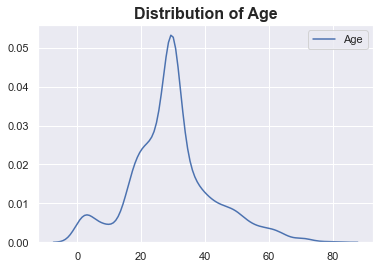

In [83]:
sns.kdeplot(df['Age'])
plt.title('Distribution of Age', fontsize = 16, fontweight = 'bold')
plt.show()

In [84]:
df['Age Category'] = df['Age'].astype(int)
for i in range(len(df)):
    if 18 <= df['Age'][i] <= 30:
        df['Age Category'][i] = '18-30'
    elif 30 <= df['Age'][i] <= 40:
        df['Age Category'][i] = '30-40'
    elif 40 <= df['Age'][i] <= 50:
        df['Age Category'][i] = '40-50'
    elif 50 <= df['Age'][i] <= 60:
        df['Age Category'][i] = '50-60'
    elif 60 <= df['Age'][i] <= 70:
        df['Age Category'][i] = '60-70'
    elif 70 <= df['Age'][i] <= 80:
        df['Age Category'][i] = '70-80'

<ipython-input-84-c9fac5499e2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Category'][i] = '18-30'
C:\Users\acer\Downloads\folder to download\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-84-c9fac5499e2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Category'][i] = '30-40'
<ipython-input-84-c9fac5499e2b>:10

In [85]:
df.loc[df['Sex'] == 'female', 'Sex'] = 0
df.loc[df['Sex'] == 'male', 'Sex'] = 1

In [86]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [87]:
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 1
df.loc[df['Embarked'] == 'C', 'Embarked'] = 2
df['Embarked'].fillna(np.mean(df['Embarked']), inplace = True)

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,NaN,0.0,1,18-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,C85,2.0,1,30-40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,NaN,0.0,0,18-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,C123,0.0,1,30-40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,NaN,0.0,0,30-40


In [89]:
features = ['PassengerId', 'Pclass', 'Age', 'Family']

# Data Visualization

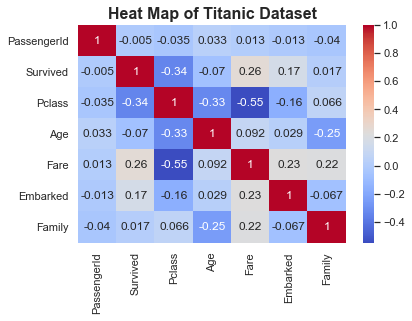

In [90]:
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)
plt.title('Heat Map of Titanic Dataset', fontsize = 16, fontweight = 'bold')
plt.show()

# Make Training and Test Set

In [91]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [92]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 4), (179, 4), (712,), (179,))

In [93]:
X_train.head()

,PassengerId,Pclass,Age,Family
692,693,3,29.699118,0
481,482,2,29.699118,0
527,528,1,29.699118,0
855,856,3,18.000000,1
801,802,2,31.000000,2


In [94]:
y_train.head()

692    1
481    0
527    0
855    1
801    1
Name: Survived, dtype: int64

In [95]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [96]:
len(predictions)

179

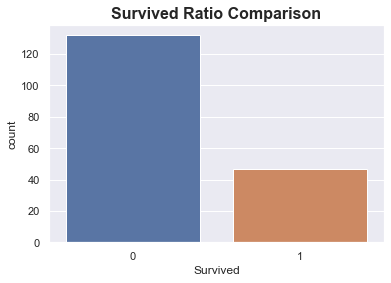

In [97]:
sns.countplot(predictions)
plt.title('Survived Ratio Comparison', fontsize = 16, fontweight = 'bold')
plt.xlabel('Survived')
plt.show()

In [98]:
survived = list(predictions).count(1)
survived_pct = survived * 100 / (survived + len(predictions) - survived)
print(f'Survived: {round(survived_pct, 2)}%')
print(f'Not Survived: {round(100 - survived_pct, 2)}%')

Survived: 26.26%
Not Survived: 73.74%


# Model Evaluation

In [101]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

In [102]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       132
           1       0.43      0.64      0.52        47

    accuracy                           0.69       179
   macro avg       0.64      0.67      0.64       179
weighted avg       0.74      0.69      0.70       179



In [103]:
print(confusion_matrix(predictions, y_test))

[[93 39]
 [17 30]]


In [104]:
def evaluate_model(model, predictions, actual):
    print('CLASSIFICATION REPORT:')
    print(classification_report(predictions, actual))
    print('=' * 100)
    print('\nCONFUSION MATRIX:')
    sns.heatmap(confusion_matrix(predictions, actual), annot = True, cmap = 'viridis')
    plt.title('Confusion Matrix')
    plt.show()

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       132
           1       0.43      0.64      0.52        47

    accuracy                           0.69       179
   macro avg       0.64      0.67      0.64       179
weighted avg       0.74      0.69      0.70       179


CONFUSION MATRIX:


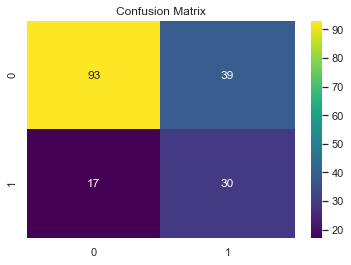

In [105]:
evaluate_model(model, predictions, y_test)

# Actual Values vs. Predictions

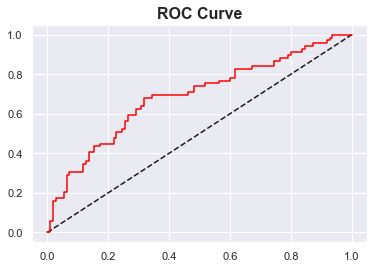

In [106]:
predicted_probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color = 'red')
plt.title('ROC Curve', fontsize = 16, fontweight = 'bold')
plt.show()